# Analyzing Genetic Mutations in Ribosomal Protein S12
# A Statistical Analysis
## CHE 116 Numerical Methods and Statistics
----
*Dominic Giambra*

# Abstract
Evolution is one of the most integral discoveries in Biology, however there are still many parts of it that are not fully understood, including why certain mutations take place, and when and how these mutations take place and follow through subsequent evolutions. Scientists have also been attempting to create a rooted evolutionary tree. Many different methods have been used, but the most successful has been Ribosomal Protein Analysis, as Ribosomal Proteins are least likely to undergo Horizontal Gene Transfer, which negates any work that could be done. Through this analysis, one lab determined that the Last Universal Common Ancestor from which all organisms evolved is Kineococcus radiotolerans, an Actinobacteria **[1]**. The purpose of this project is to do a statistical analysis on the genetic mutations undergone through millions of years of evolution, by comparing all cataloged sequences of Ribosomal Protein S12 to that of LUCA. Any observed statistic trends can help to build a complete evolutionary tree, can help explain how proteins evolve, and predict future evolutionary traits, and fill in the gaps in current evolutionary theory.

# Sequence Analysis
The first step that must be done before any statistic analysis can be done is to analyze the sequence of these proteins. Proteins are made up of amino acids, and these amino acids are in a very specific order, and this order determines the proteins function. Ribosomal Protein S12 is a single protein found in the ribosome of every organism. This protein serves the same purpose in every organism, which means that there should be some similarities in structure. To map these out a sequence alignment must be done, this means that the protein sequences need to be lined up next to each other with the proper order.

The code in the next cell lays the ground work that must be done for sequence alignment, but before that can be explained, the acquisition of these sequences must be explained. There is a tool, Prosite, which can take in a motif, or possible alignment for a protein, and return all proteins in the Swiss-Prot and Trembl databases which match this pattern. To begin, a scan was run using this tool and the Ultimuf for Ribosomal Protein S12, the motif which encompasses all copies of S12:  
  
X(0,40)[PASYQV][KRINT][KQN]P[HNS][SA][AGS]X[RIKG][KPRHM]X(5)[CLIFM]X(0,3)X(7)  [YFHSNRLAQ][LIVACT][VMGPSQAT]X(15,35)DX[SIP][ATG][VLCMIT]X(0,45) **[2]**  
  
The results of this search where then acquired into a fasta formatted file, which is a specific format used to store multiple genetic sequences. A sample fasta sequence used is:  
  
>sp|A4GYN8|RR12B_POPTR 30S ribosomal protein S12-B, chloroplastic OS=Populus trichocarpa GN=rps12-B PE=3 SV=1
MPTIKQLIRNTRQPIRNVTKSPALGGCPQRRGTCTRVYSGSKGDLSVNFSTITPKKPNSA
LRKVARVRLTSGFEITAYIPGIGHNSQEHSVVLVRGGRVKDLPGVRYHIVRGTLDAVGVK
DRQQGRSQYGVKKPK
  
The code in the following cell introduces a python package called biopython, commonly used for biological analysis. What this code does is create a dictionary, where the keys are the UNIPROT identifiers for each protein, and the value is that protein sequence.

```python
%%time
import Bio
from Bio import SeqIO
d={}
fasta_sequences = SeqIO.parse(open('job.fasta'),'fasta')
h=0
for fasta in fasta_sequences:
        name, sequence = fasta.id, fasta.seq.tostring()
        d[name[3:9]]=sequence
```

Now that the primary dictionary of all the proteins has been created, the next step is the protein alignment. Sequence Alignment is actually a very difficult and time intensive process. It involves matching up two genetic sequences, even with all the necessary mutations. Biopython has a package built to do exactly this. The following cell gives an example.

In [1]:
!pip install biopython
import Bio
from Bio.pairwise2 import format_alignment
for a in Bio.pairwise2.align.globalxx("ACCGT", "ACG"):
     print(format_alignment(*a))

ACCGT
|||||
AC-G-
  Score=3

ACCGT
|||||
A-CG-
  Score=3



As shown above, the pairwise function returns all possible combinations, and scores each one. In this project, the scoring mechanism used will be identical characters are given a score of one, while all others are given zero. This is because it is known that these are the same protein, penalties are used when it is not known if these are the same protein because in those cases you do not want to be adding hundreds of spaces wherever you can to make the proteins more similar. In this case it is known that spaces are necessary. The code below repeats that same process, except it takes every sequence and aligns it with that of  Kineococcus radiotolerans, and outputs a dictionary containing the highest scoring alignment. 

``` python
%%time
from Bio import pairwise2
alignments={}
for name in d:
    alignments[name] = pairwise2.align.globalxx(d['A6W5T2'], d[name])[0][0:2]

print(alignments)
```

At this point the final steps for the sequence analysis are being done. Before continuing however, it is imperative to define and understand what "genetic mutation" actually means. At its core, it means a change in the genetic code of an organism, which is exactly what is going to be analyzed, however, for the purposes of this category, three specific mutations are going to be examined. First is deletion. In terms of this protein, this means that when an organism evolved, it deleted an amino acid from its protein structure for some reason. The next is insertion, this means that an amino acid was inserted in between two already occurring amino acids. Thirdly is Missense mutation, this is when the amino acid is changed. There is still an amino acid in this spot in the protein, but it is a different acid than was found previously. The fourth category that will be counted and analyzed is conserved residues, these are residues where no mutation took place. To begin, the following cell analyzes all alignments, and keeps track of the total number of conserved residues, deletions, insertions, and mutations. 

``` python
%%time
con=0
dele=0
ins=0
tr=0
for name in alignments:
    for i in range(len(alignments[name][1])):
        if alignments[name][0][i]==alignments[name][1][i]:
            con+=1
        if alignments[name][0][i]!=alignments[name][1][i]:
            if alignments[name][0][i]=="-":
                ins+=1
            if alignments[name][1][i]=="-":
                dele+=1
            else:
                tr+=1
```

While these counts are interesting and important, for the purposes of this project, the more important counts are done below. The following cells do something similar, they do count the number of mutations, however, rather than totaling them up, it creates a dictionary which keeps track of these totals for every protein. This is the final step in being able to statistically analyze these genetic mutations, as this created the data which will be analyzed.

```python
%%time
test={}
for name in alignments:
    test[name]=[0,0,0,0]
print(test)
#first entry con
#second dele
#third ins
#fourth tr
for name in alignments:
    for i in range(len(alignments[name][1])):
        if alignments[name][0][i]==alignments[name][1][i]:
            test[name][0]+=1
        if alignments[name][0][i]!=alignments[name][1][i]:
            if alignments[name][0][i]=="-":
                 test[name][1]+=1
            if alignments[name][1][i]=="-":
                 test[name][2]+=1
            else:
                 test[name][3]+=1
```

```python
con_l=[]
dele_l=[]
ins_l=[]
tr_l=[]
for name in test:
    con_l.append(test[name][0])
    dele_l.append(test[name][1])
    ins_l.append(test[name][2])
    tr_l.append(test[name][3])
```

The above cells not only take a lot of computing power and code repetition, but storing all of the variables takes up a lot of RAM. Luckily, using python, a function can be created which solely takes in the name of a fasta file, and returns a list of four different nested lists, one for each mutation. An example of that function is as follows.

In [1]:
def mut_count(job):
    '''This function used to to calculate the number of certain types of genetic mutations using the biopython package. \n Can only be used with fasta formatted sequence documents. \n Function in current form can only be used for ribosomal protein S12, and compares all proteins to Kineococcus radiotolerans, Luca. 
                Args: name of file
                Returns: A list of 4 lists. First list is the number of conserved residues in each protein, the second is the number of deletions, 
                         the third is the number of insertions, and the forth is the number of mutations.'''
    from Bio import SeqIO
    d={}
    fasta_sequences = SeqIO.parse(open(job),'fasta')
    h=0
    for fasta in fasta_sequences:
        name, sequence = fasta.id, fasta.seq.tostring()
        d[name[3:9]]=sequence
    from Bio import pairwise2
    alignments={}
    A6W5T2 = 'MPTIQQLVRKGREDKVVKTKTPALKGSPQRRGVCTRVYTTTPKKPNSALRKVARVKLTSGIEVTAYIPGVGHNLQEHSMVLVRGGRVKDLPGVRYKIVRGSLDTQGVKNRKQARSRYGAKKEKS'
    for name in d:
        alignments[name] = pairwise2.align.globalxx(A6W5T2, d[name])[0][0:2]
    test={}
    for name in alignments:
        test[name]=[0,0,0,0]
    #first entry con
    #second dele
    #third ins
    #fourth tr
    for name in alignments:
        for i in range(len(alignments[name][1])):
            if alignments[name][0][i]==alignments[name][1][i]:
                test[name][0]+=1
            if alignments[name][0][i]!=alignments[name][1][i]:
                if alignments[name][0][i]=="-":
                     test[name][1]+=1
                if alignments[name][1][i]=="-":
                     test[name][2]+=1
                else:
                     test[name][3]+=1
    list=[[],[],[],[]]
    for name in test:
        list[0].append(test[name][0])
        list[1].append(test[name][1])
        list[2].append(test[name][2])
        list[3].append(test[name][3])
    return list

In order to conserve computing power, the cells describing the process will not be used, all data will be acquired through the written function.

In [2]:
allmut = mut_count('job.fasta')

C:\Users\DR\Anaconda3\lib\site-packages\Bio\Seq.py:343: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


The variable allmut is the a list of lists, and is shorthand for all mutations. The first list is the count of conserved residues for each protein, the second is the count of deleted residues, the third is the count of inserted residues, and the fourth is the mutated residues.

# Statistical Analysis
Now that the data has been created, it can be analyzed. First, a histogram of each type of mutation is plotted.

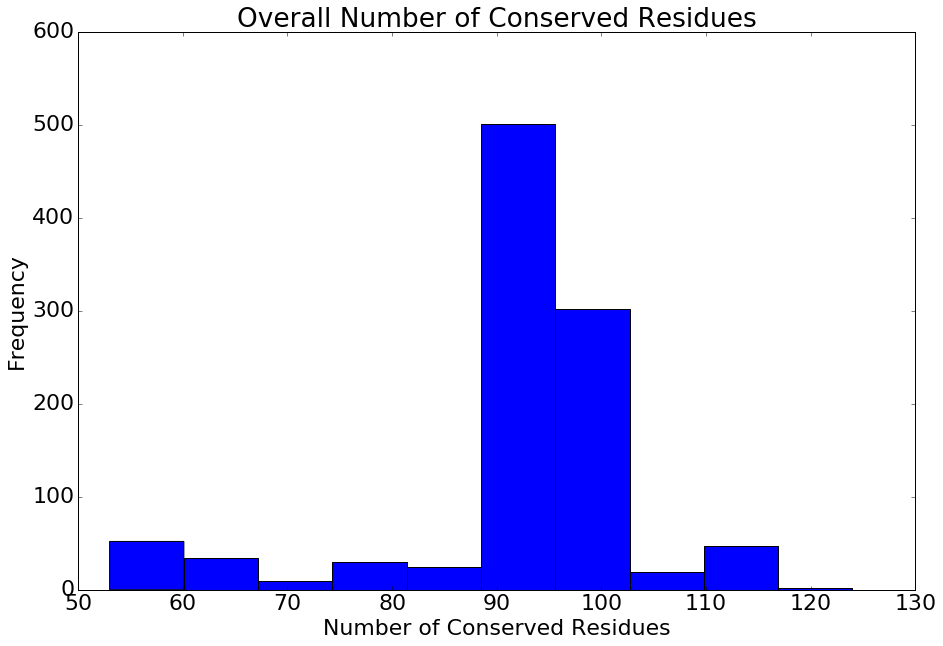

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
plt.hist(allmut[0])
plt.title('Overall Number of Conserved Residues')
plt.xlabel('Number of Conserved Residues')
plt.ylabel('Frequency')
plt.show()

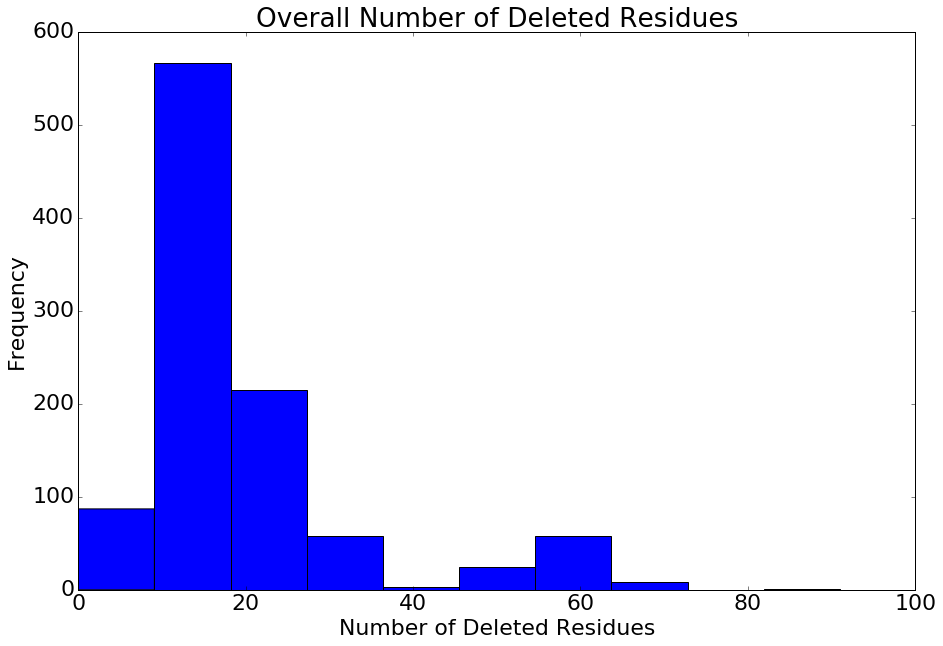

In [4]:
plt.figure(figsize=(15,10))
plt.hist(allmut[1])
plt.title('Overall Number of Deleted Residues')
plt.xlabel('Number of Deleted Residues')
plt.ylabel('Frequency')
plt.show()

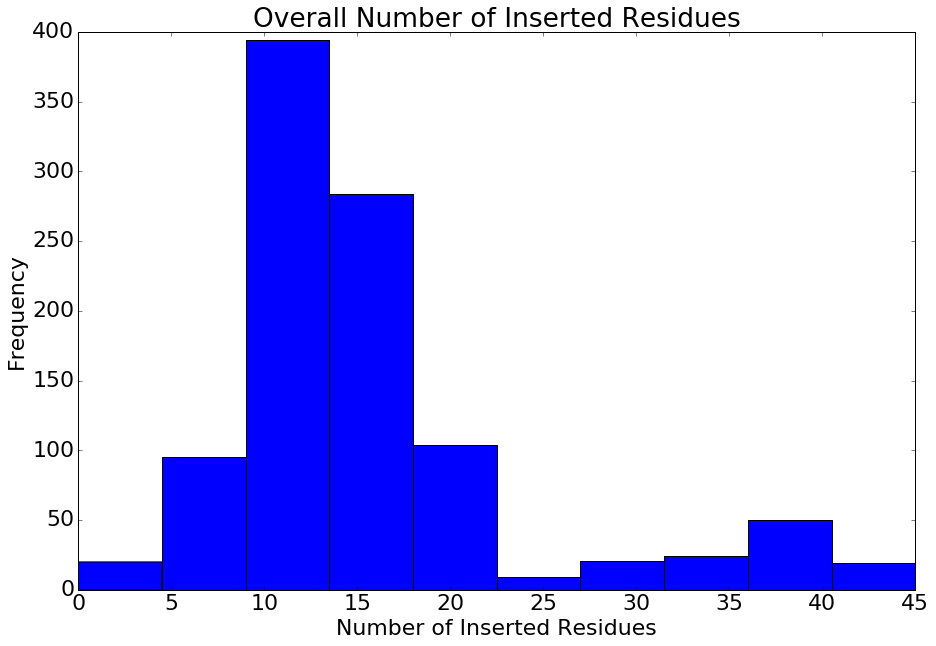

In [5]:
plt.figure(figsize=(15,10))
plt.hist(allmut[2])
plt.title('Overall Number of Inserted Residues')
plt.xlabel('Number of Inserted Residues')
plt.ylabel('Frequency')
plt.show()

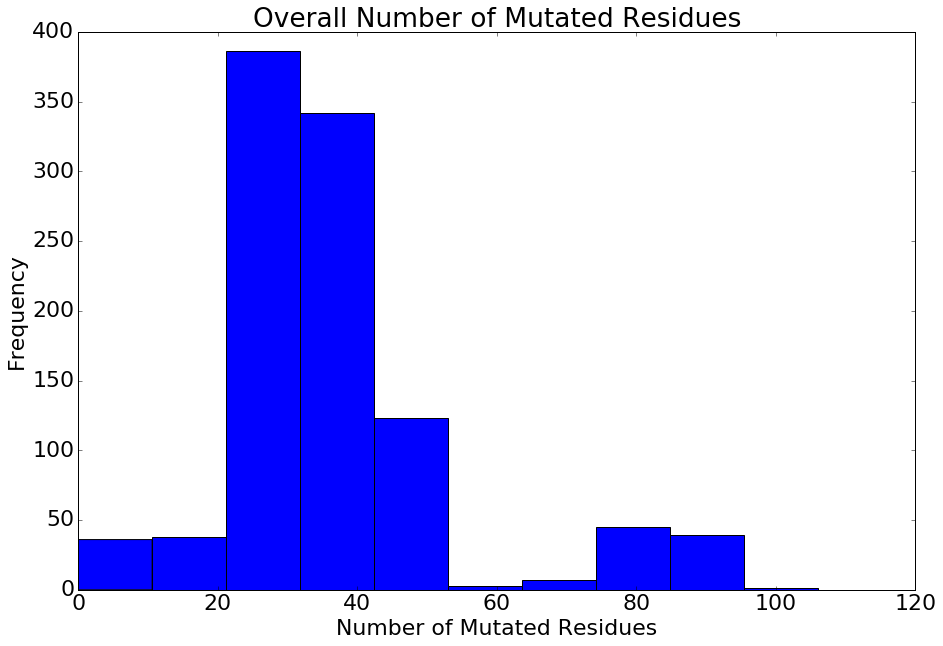

In [6]:
plt.figure(figsize=(15,10))
plt.hist(allmut[3])
plt.title('Overall Number of Mutated Residues')
plt.xlabel('Number of Mutated Residues')
plt.ylabel('Frequency')
plt.show()

## Normality Test
Many things in the world can be approximated by a normal distribution, often called a bell curve. This includes heights of humans, size of snowflakes, exam grades, and many more. The reason this is observed is due to the Central Limit Theorem. **[3]** All of the examples given have some central data point which occurs most often, and the farther away from this central point, or mean, a data point is, the less likely it is to occur. If a normal distribution was found in these mutations, it could represent a trend, a number of mutations most likely to occur, with tapering probabilities on either side, which could explain many facets of evolution. To test if any of these data sets are normally distributed, a Shapiro-Wilk hypothesis test will be used. The Shapiro-Wilk test takes in a set of data points, and returns a p-value. If that p-value is greater than a predetermined amount $\alpha$ it is more likely that the distribution is normally distributed, however it cannot be proved that the distribution is normal. For the purposes of this work, $\alpha = .05$, the standard for probability. Scipy's statistics package has a built in Shapiro-Wilks test, however if the data was to be calculated for all 1200 terms, the equation used is:
$$W=\frac{(\sum^{n}_{i=1}a_{i}x_{(i)})^{2}}{\sum^{n}_{i=1}(x_{i}-\bar{x})^{2}}[4]$$ 
$x_{(i)}= $ The ith order data point  
$\bar{x}=$ Sample Mean  
$a_{i}=\frac{m^{T}V^{-1}}{(m^{T}V^{-1}V^{-1}m)^{\frac{1}{2}}}$  
where:  
$m = (m_{1},...,m_{n})^{T}$  
$m_{i} =$ expected values  
$V =$ covariance matrix  
The Scipy function also returns a p-value, to calculate the p-value, a Wilks-Shapiro table must be used.

The first normality test will be run for the conserved residues. The data list is the first nested list from the returned list from the mut_count function, where each element is the number of conserved residues from a certain protein.

In [7]:
import scipy.stats as ss
a_c = ss.shapiro(allmut[0])
print('The p-value for the conserved residues is {}.'.format(a_c[1]))

The p-value for the conserved residues is 5.205128933881918e-34.


**In this case, even with 1200 samples, the p-value is nearly zero, which means it can be concluded the conserved residues are not normally distributed.**

The second normality test will be run for deleted residues. The data list is the second nested list from the returned list from the mut_count function, where each element is the number of deleted residues from a certain protein.

In [8]:
a_d = ss.shapiro(allmut[1])
print('The p-value for the deleted residues is {}.'.format(a_d[1]))

The p-value for the deleted residues is 8.23965147192064e-36.


**Again, the p-value is nearly zero, which means it can be concluded that the deleted residues are not normally distributed.**

The third test will be run for inserted residues. The data list is the third nested list returned from the mut_count function, where each element is the number of inserted residues from a certain protein.

In [9]:
a_i = ss.shapiro(allmut[2])
print('The p-value for the inserted residues is {}.'.format(a_i[1]))

The p-value for the inserted residues is 5.558390241065459e-34.


**For the third time, the p-value is nearly zero, which means it can be concluded that the inserted residues are not normally distributed.**

The last normality test in this section is for mutated residues. The data list is the fourth nested data list returned from the mut_count function, where each element is the number of inserted residues from a certain protein.

In [10]:
a_m = ss.shapiro(allmut[3])
print('The p-value for the mutated residues is {}.'.format(a_m[1]))

The p-value for the mutated residues is 8.23208049622019e-35.


**Lastly, the p-value is again nearly zero, which means it can be concluded that the inserted residues are not normally distributed.**

## Mutual Distribution
Normal distributions are not the only distributions. In fact, Wikipedia lists over 100 different types of distributions. While the normal distribution was the most likely distribution to be followed, there are many other options. Rather than testing everyone of them, one can test if different data sets belong to the same distribution. The test used for this decision is the Wilcoxon's Signed Rank Test. This test is used to determine if two matched sets come from the same parent distribution. Matched sets mean that the data comes in pairs, in this case it means that the i-th element in each list belongs to the same protein. The equation used for this test is:
$$W=\sum^{N_{r}}_{i=1}[sgn(x_{2,i}-x_{1,i})\cdot R_{i}][5]$$
$W=$ statistic value  
$sgn=$ sign function  
$R_{i}=$ rank  
Like the Shapiro-Wilk test, this W value is then looked up on a table and the p-value is found from there. Scipy also has a function for this test.

Because this test requires two data sets, each set will be compared to the other, which makes for a total of 6 different tests. First, the conserved residues will be tested with the other three.

**Conserved and Deleted**

In [11]:
ss.wilcoxon(allmut[0],allmut[1])

WilcoxonResult(statistic=660.5, pvalue=1.5119236732637693e-166)

For all intensive purposes, this p-value is 0, which means the conserved and deleted residues do not come from the same distribution.

**Conserved and Inserted**

In [12]:
ss.wilcoxon(allmut[0],allmut[2])

WilcoxonResult(statistic=0.0, pvalue=1.5196292327120387e-168)

Again, for all intensive purposes, the p-value is 0 which means the conserved and inserted residues are not from the same distribution.

**Conserved and Mutated**

In [13]:
ss.wilcoxon(allmut[0],allmut[3])

WilcoxonResult(statistic=4926.5, pvalue=2.7424387546427795e-162)

The p-value is almost 0, which means the conserved and mutated residues are not from the same distribution.

**Deleted and Inserted**

In [14]:
ss.wilcoxon(allmut[1],allmut[2])

WilcoxonResult(statistic=47276.0, pvalue=5.5897439171032689e-50)

While 100 magnitudes of order larger than the previous comparisons, this p-value is still relatively 0 meaning the deleted and inserted residues do not belong to the same distribution.

**Deleted and Mutated**

In [15]:
ss.wilcoxon(allmut[1],allmut[3])

WilcoxonResult(statistic=0.0, pvalue=1.2595269036205531e-168)

The p-value is almost 0, which means the deleted and mutated residues are not from the same distribution.

**Inserted and Mutated**

In [16]:
ss.wilcoxon(allmut[2],allmut[3])

WilcoxonResult(statistic=2980.5, pvalue=1.2798981254019141e-164)

The p-value is almost 0, which means the inserted and mutated residues are not from the same distribution.

## Correlation Test

Another statistic possibility that could be significant is the possibility of correlation between two of the lists. This means that there is some relation between pairs of variables. However, it does not mean the data is from the same distirbution like the wilcoxon test. The test used for this analysis is Spearman's Correlation Test. This test again uses matched sets of data. However, this test is opposite of the last two. For there to be a correlation between the two sets of data, a p-value below .05 is needed, not above. The equation used is :  $$ r_s = {1- \frac {6 \sum d_i^2}{n(n^2 - 1)}}[6]$$  
$r_s=$ score   
$\rho=$ Pearson correlation coefficient
$cov(rg_x,rg_y)=$ is the covariance of the rank variables  
$\sigma_{rgx}$ and $\sigma_{rgy}=$ standard deviations of rank variables  
In this case, the score gotten from the equation is then converted to a P-value using the t-distribution. For this case again, as the test needs two lists, all 6 possibilities will be tested.

** Conserved and Deleted**

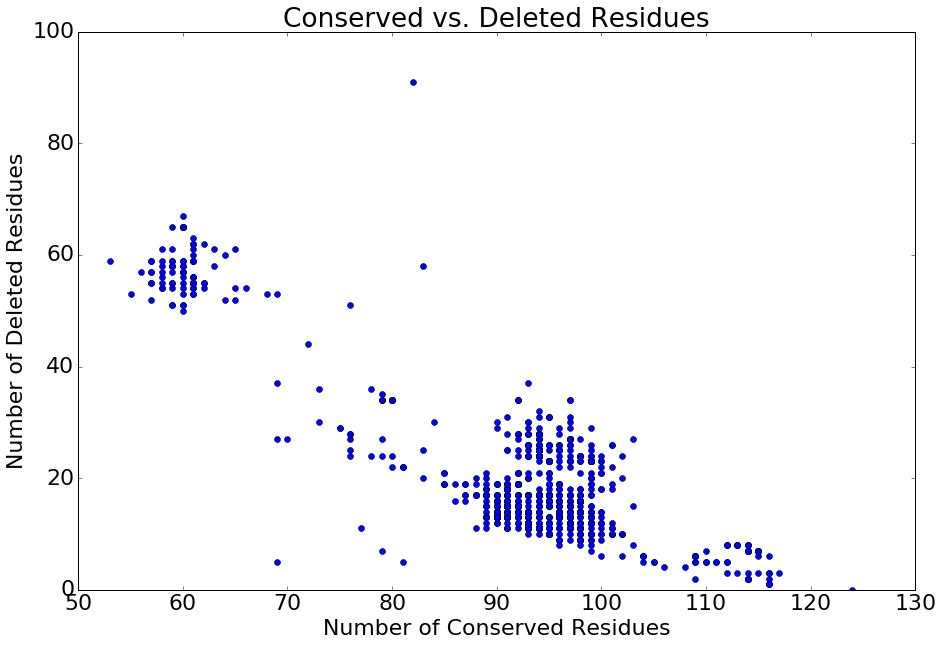

In [17]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(allmut[0],allmut[1],'o')
plt.title('Conserved vs. Deleted Residues')
plt.xlabel('Number of Conserved Residues')
plt.ylabel('Number of Deleted Residues')
plt.show()

In [18]:
ss.spearmanr(allmut[0],allmut[1])

SpearmanrResult(correlation=-0.47167154234055736, pvalue=1.2494714997349977e-57)

In this case, a low p-value indicates a correlation, which in this case is strongly negative. 

**Conserved and Inserted**

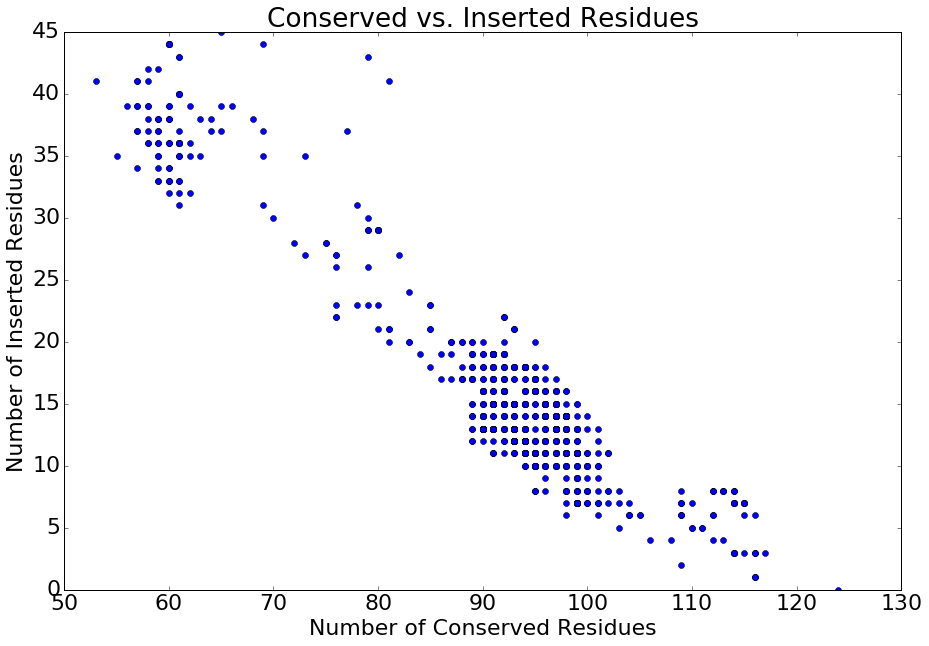

In [19]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(allmut[0],allmut[2],'o')
plt.title('Conserved vs. Inserted Residues')
plt.xlabel('Number of Conserved Residues')
plt.ylabel('Number of Inserted Residues')
plt.show()

In [20]:
ss.spearmanr(allmut[0],allmut[2])

SpearmanrResult(correlation=-0.76586622941500448, pvalue=1.8716900354186369e-197)

In this case, a low p-value indicates a correlation, which in this case is strongly negative. 

**Conserved and Mutated**

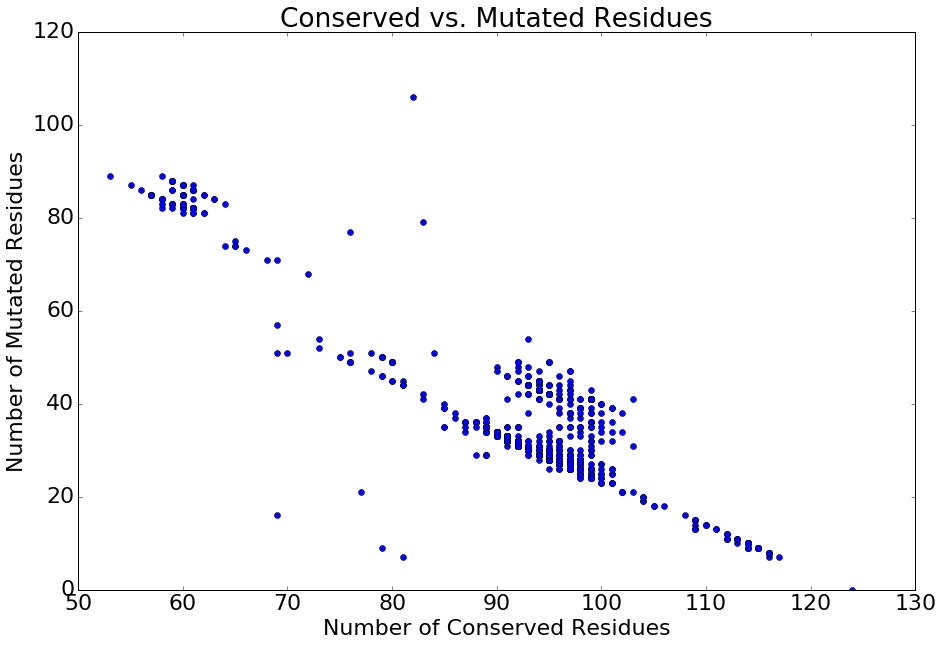

In [21]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(allmut[0],allmut[3],'o')
plt.title('Conserved vs. Mutated Residues')
plt.xlabel('Number of Conserved Residues')
plt.ylabel('Number of Mutated Residues')
plt.show()

In [22]:
ss.spearmanr(allmut[0],allmut[3])

SpearmanrResult(correlation=-0.66496853708047299, pvalue=3.4582783311984686e-131)

In this case, a low p-value indicates a correlation, which in this case is strongly negative. 

**Deleted and Inserted**

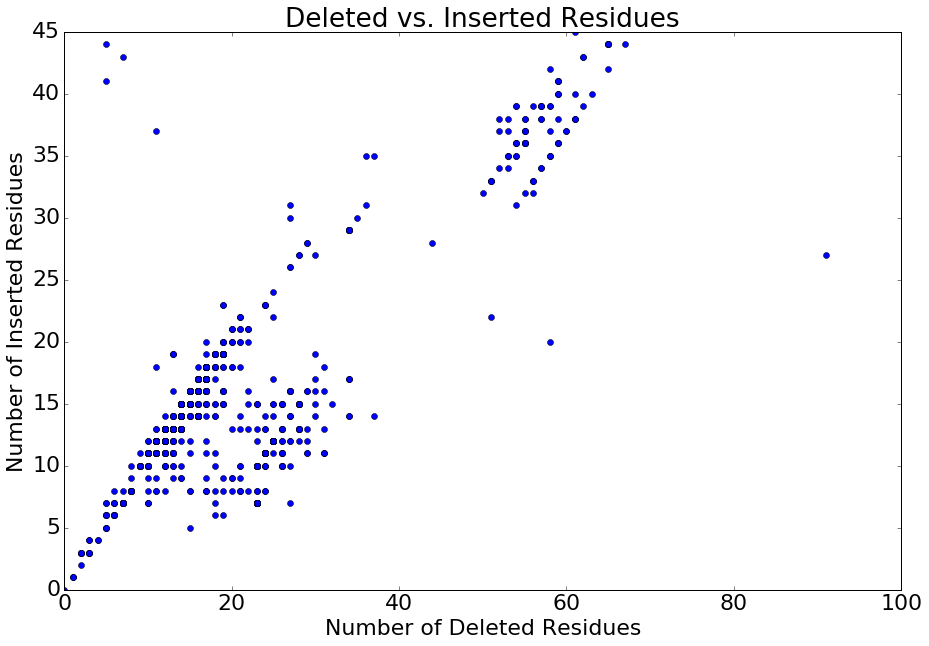

In [23]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(allmut[1],allmut[2],'o')
plt.title('Deleted vs. Inserted Residues')
plt.xlabel('Number of Deleted Residues')
plt.ylabel('Number of Inserted Residues')
plt.show()

In [24]:
ss.spearmanr(allmut[1],allmut[2])

SpearmanrResult(correlation=0.58144344231796874, pvalue=2.6533854229586999e-93)

In this case, a low p-value indicates a correlation, which in this case is strongly positive.

**Deleted and Mutated**

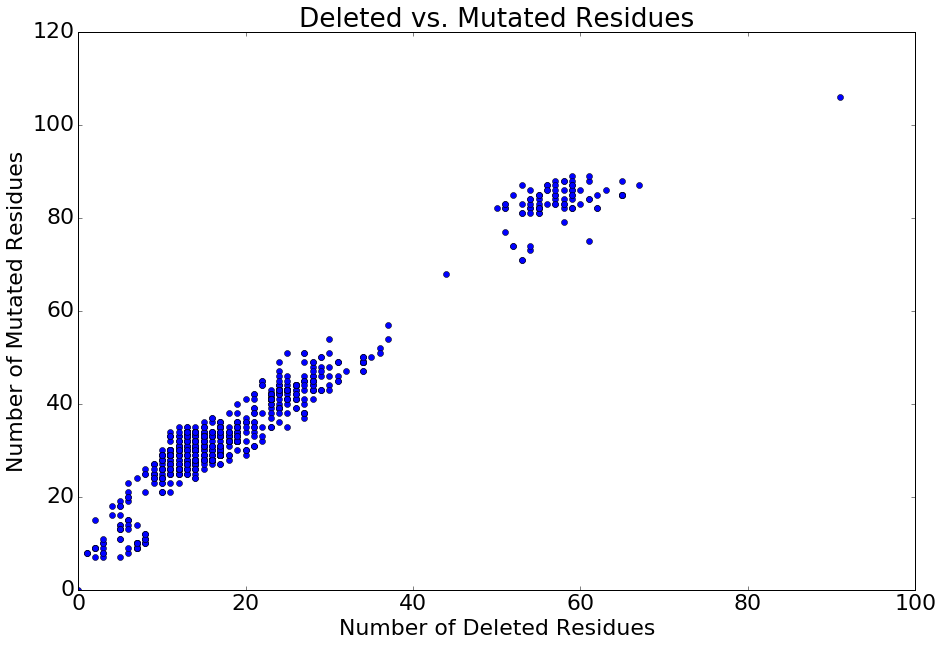

In [25]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(allmut[1],allmut[3],'o')
plt.title('Deleted vs. Mutated Residues')
plt.xlabel('Number of Deleted Residues')
plt.ylabel('Number of Mutated Residues')
plt.show()

In [26]:
ss.spearmanr(allmut[1],allmut[3])

SpearmanrResult(correlation=0.8663976314386107, pvalue=2.7582398897578852e-309)

In this case, a low p-value indicates a correlation, which in this case is strongly positive.

**Inserted and Mutated**

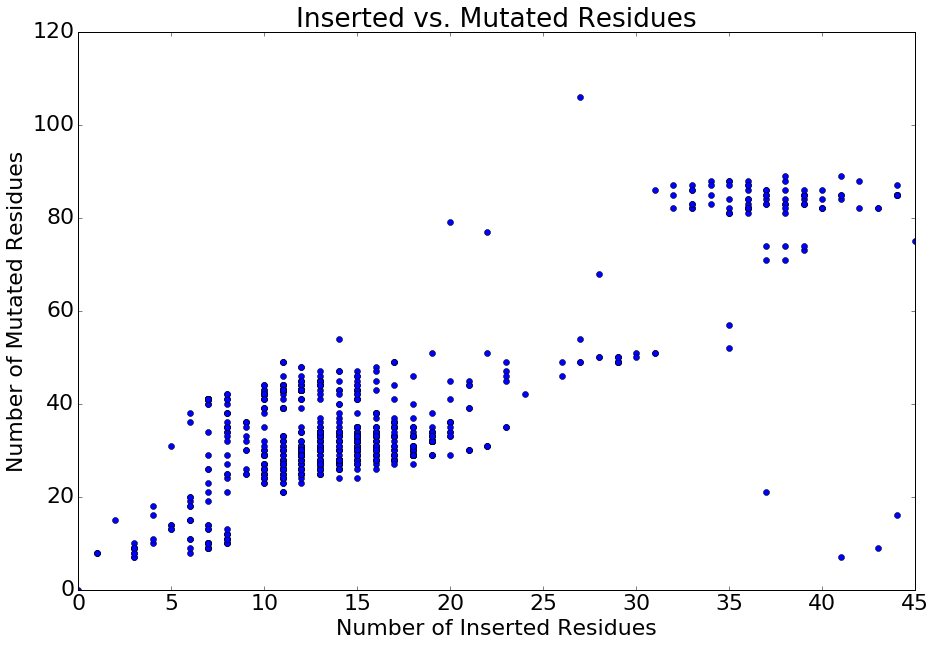

In [27]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(allmut[2],allmut[3],'o')
plt.title('Inserted vs. Mutated Residues')
plt.xlabel('Number of Inserted Residues')
plt.ylabel('Number of Mutated Residues')
plt.show()

In [28]:
ss.spearmanr(allmut[2],allmut[3])

SpearmanrResult(correlation=0.44783667972901647, pvalue=1.8357233751738666e-51)

In this case, a low p-value indicates a correlation, which in this case is strongly positive.

# Conclusions 
It can be concluded that genetic mutations in Ribosomal Protein S12 are not normally distributed. It can also be concluded that none of the mutations in Ribosomal protein S12 belong to the same parent distribution. Before these conclusions can be fully believed, there are a few errors in this analysis that could be contributing to this result. Firstly, Swiss-Prot and Trembl databases were used, and in Trembl, proteins are organized by a computer program, which means start and stop positions could be in the wrong place. Based on the Ultimuf used, all proteins are S12, so the possibility of a bad protein can be refuted even in the Trembl database. Swiss-Prot is compiled by certified Swiss scientists, so that database can be used without worry of error. The other issue is that each protein was compared to Kineococcus radiotolerans, as if everything evolved directly from that organism. However, there were steps in between. For a proper analysis, when mutations are counted, mutations that occurred earlier in evolution should be ignored, however in this analysis it is currently impossible, as there is no exact evolutionary tree from which this data can be pulled from. That also would need much more sophisticated coding, which at this point is too intensive for personal use computers, especially considering the data computed in this project put major strains on personal computers. However, based on analysis in this project, it can be concluded that there is a correlation between all of the possible mutations. This makes sense. Conserved and all other mutations have a negative correlation because each protein can only have a certain length, so if more residues are conserved, that leaves less space for mutations to have happened. Deletion and Insertion and Deletion and Mutated have positive correlations. This is statistically interesting as intuition would infer a negative correlation, because as more residues are deleted, there are fewer residues to be mutated. Insertion and Mutation have a positive correlation as well, which again makes sense, if there are more or less residues available to be mutated, both Inserted and Mutated have a higher chance or lower chance of occurring. However it should be noted that this is a correlation test, and in statistics correlation does not imply causation. It is possible either mutation caused the correlation, or that some third unknown cause can be controlling this. Further analyses can be done to help explore some of these phenomena. When technology and knowledge advance far enough, the experiment mentioned above, taking into account evolution, should be redone. Also, it is easy to download Fasta files based on Taxonomic Rank, even for a specific protein. Experiments can be done starting at each Domain, and if possible, can be done all the way down to each Genus. This would allow researchers to determine if there are statistical significances in closely related organisms.

## Bibliography  
[1] Duax, W.L., Huether, R. and Dziak, D. (2012) 'Evolution of bacterial ribosomal protein L1', *Int. J. Bioinformatics Research and Applications,* Vol. 8, Nos. 1/2, pp.99-111.  
[2] Duax Lab: Duax, W.L., Giambra, D., Liu, J., and Cheng, M.  
[3] Lyon, A. (2014) 'Why are Normal Distributions Normal?', *Br J Philos Sci,* Vol. 65, Nos. 3, pp.621-649  
[4] Shapiro, S.S., Wilk, M.B. (1965) 'An analysis of variance test for normality: Complete samples.', *Biometrika,* Vol. 52, Nos. 3-4, pp. 591-611  
[5] Wilcoxon, F. (1945) 'Individual comparisons by ranking methods' *Biometrics Bulletin* Vol. 1, Nos. 6, pp.80-83  
[6] Spearman, C. (1904) 'The proof and measurement of association between two things' *American Journal of Psychology* Vol. 15, pp.72-101

# Animated Plot

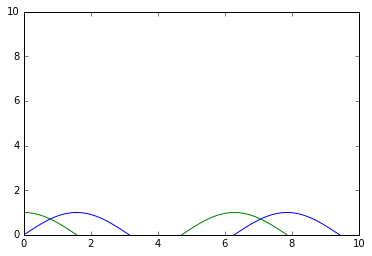

In [4]:
%matplotlib inline
import time, sys
from IPython.core.display import clear_output,display
from matplotlib import pyplot as plt
import random
import numpy as np

f, ax = plt.subplots()
from numpy import array
n = 100
x = array([i/10.0 for i in range(n)])
y1 = array([random.randint(-10, 10) for i in x])
z1 = array([random.randint(-10, 10) for i in x])
y = np.sin(x)
z=np.cos(x)
for i in range(n):
    axes = plt.gca()
    axes.set_xlim([0,10])
    axes.set_ylim([0,10])
    ax.plot(x[:i],y[:i])
    ax.plot(x[:i],z[:i])
    time.sleep(0.0001)
    clear_output(wait=True)
    display(f)
    ax.cla() 
plt.close()

$$$$
<font color='white'>WUBBA LUBBA DUB DUB</font>
$$$$

In [39]:
%reload_ext giphy_magic
%giphy happy little accidents